## Laboratorio de Visualización de Datos

Este notebook contiene el análisis y las visualizaciones discutidas para el laboratorio sobre emisiones de sistemas de alimentos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga y Exploración de Datos

In [2]:
data = pd.read_csv('Food Share Emissions.csv')
data.head()

,Entity,Code,Year,Food's share of total emissions (incl. LULUFC)
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834


### Análisis por Países

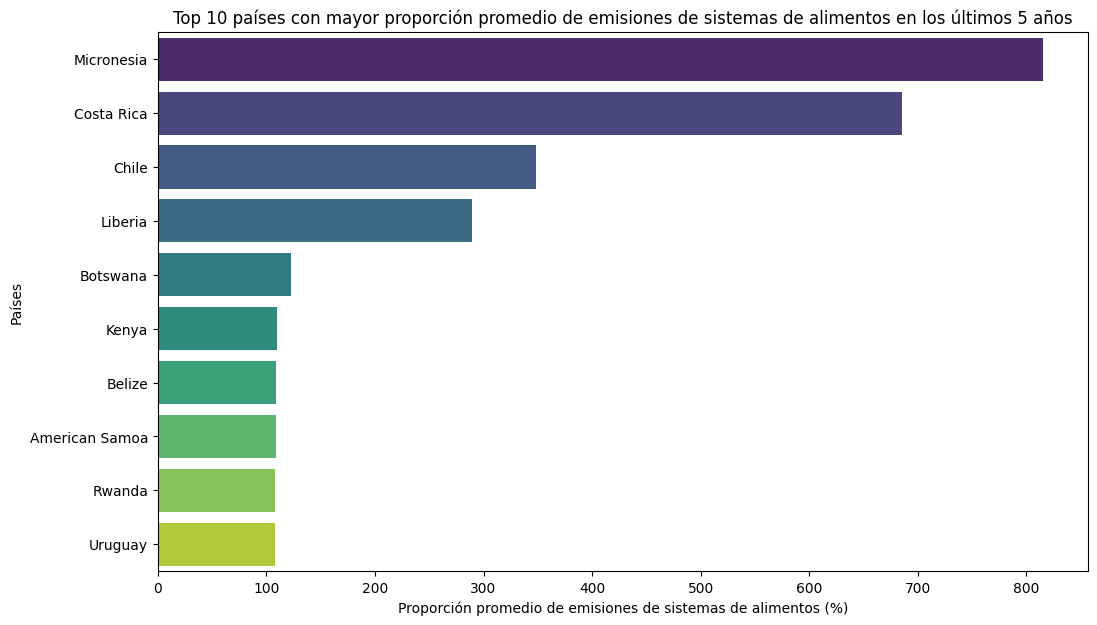

In [26]:
# Filtramos los datos para los últimos 5 años
last_5_years = data['Year'].unique()[-5:]
data_last_5_years = data[data['Year'].isin(last_5_years)]

# Calculamos el top 10 de países con la mayor proporción promedio de emisiones
top_countries_last_5_years = data_last_5_years.groupby('Entity').mean().sort_values(by="Food's share of total emissions (incl. LULUFC)", ascending=False).head(10).reset_index()

# Visualizamos los resultados
plt.figure(figsize=(12, 7))
sns.barplot(x="Food's share of total emissions (incl. LULUFC)", y='Entity', data=top_countries_last_5_years, palette='viridis')
plt.title(f"Top 10 países con mayor proporción promedio de emisiones de sistemas de alimentos en los últimos 5 años")
plt.xlabel("Proporción promedio de emisiones de sistemas de alimentos (%)")
plt.ylabel("Países")
plt.show()

### Los países representados por las barras más altas en esta gráfica son los que tienen las mayores emisiones promedio relacionadas con sistemas de alimentos en los últimos 5 años. El país en la parte superior de la gráfica sería el que tiene la mayor proporción promedio.

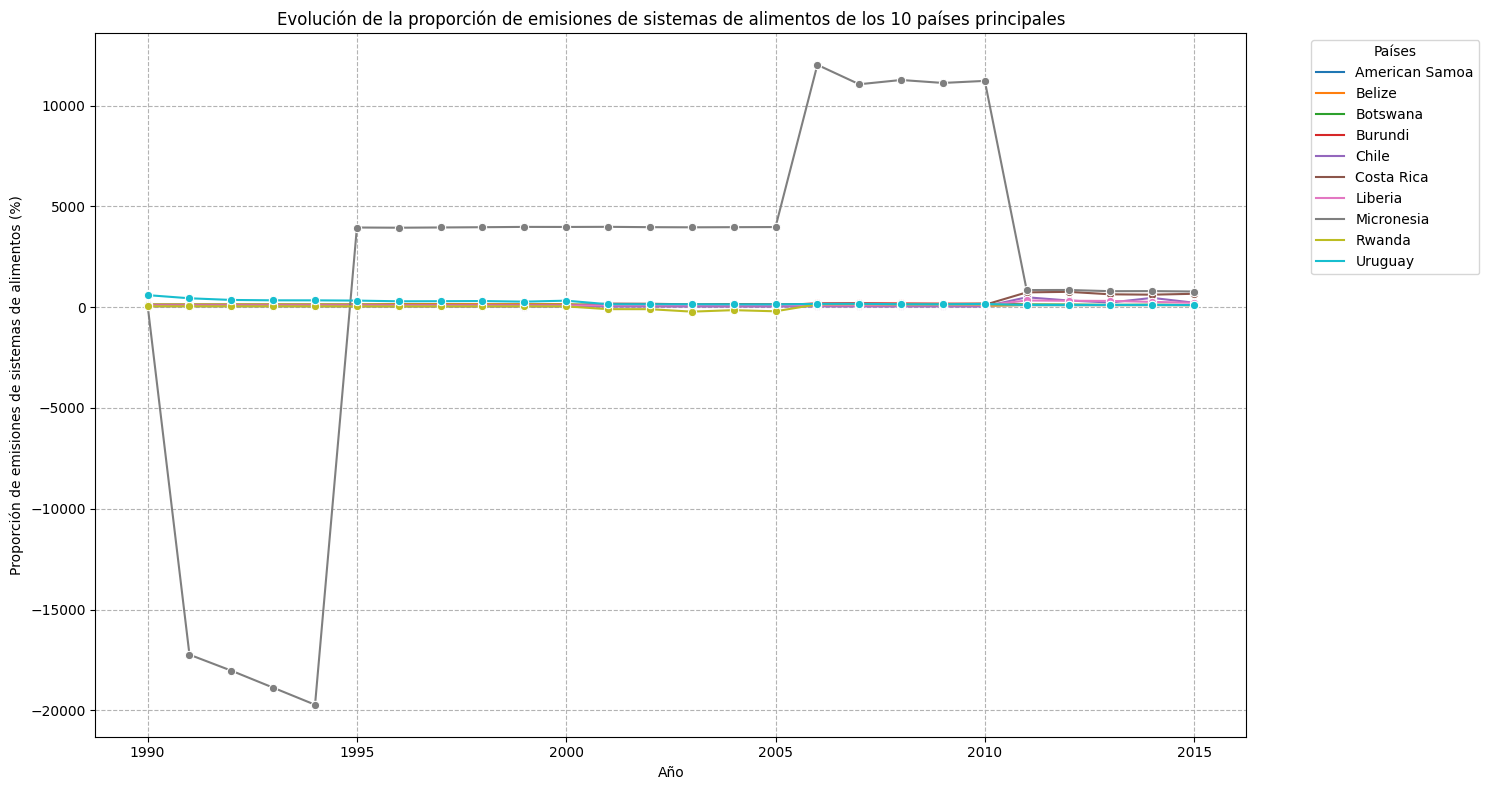

In [27]:
top_countries_data = data[data['Entity'].isin(top_countries['Entity'])]
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_countries_data, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Entity', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos de los 10 países principales")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

###  Las líneas que muestran una tendencia ascendente indican países cuya proporción de emisiones de sistemas de alimentos ha aumentado a lo largo de los años. La línea del pais Micronesia es el que mas variaciones a teniado a lo largo del año.

### Análisis por Continentes

In [6]:
continent_mapping = {
    "Asia": ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia",
             "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan",
             "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar",
             "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Russia", "Saudi Arabia",
             "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste",
             "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"],
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cape Verde", "Cameroon", 
               "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea", 
               "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast",
               "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", 
               "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", 
               "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", 
               "Tunisia", "Uganda", "Zambia", "Zimbabwe"],
    "Europe": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
               "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", 
               "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", 
               "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "San Marino", 
               "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"],
    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", 
                      "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", 
                      "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", 
                      "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"],
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", 
                      "Suriname", "Uruguay", "Venezuela"],
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", 
                "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
}

data["Continent"] = data["Entity"].map({country: continent for continent, countries in continent_mapping.items() for country in countries})
data_continents = data.dropna(subset=["Continent"])
data_continents.head()

,Entity,Code,Year,Food's share of total emissions (incl. LULUFC),Continent
0,Afghanistan,AFG,1990,78.558522,Asia
1,Afghanistan,AFG,1991,79.335651,Asia
2,Afghanistan,AFG,1992,84.268804,Asia
3,Afghanistan,AFG,1993,85.247941,Asia
4,Afghanistan,AFG,1994,86.897834,Asia


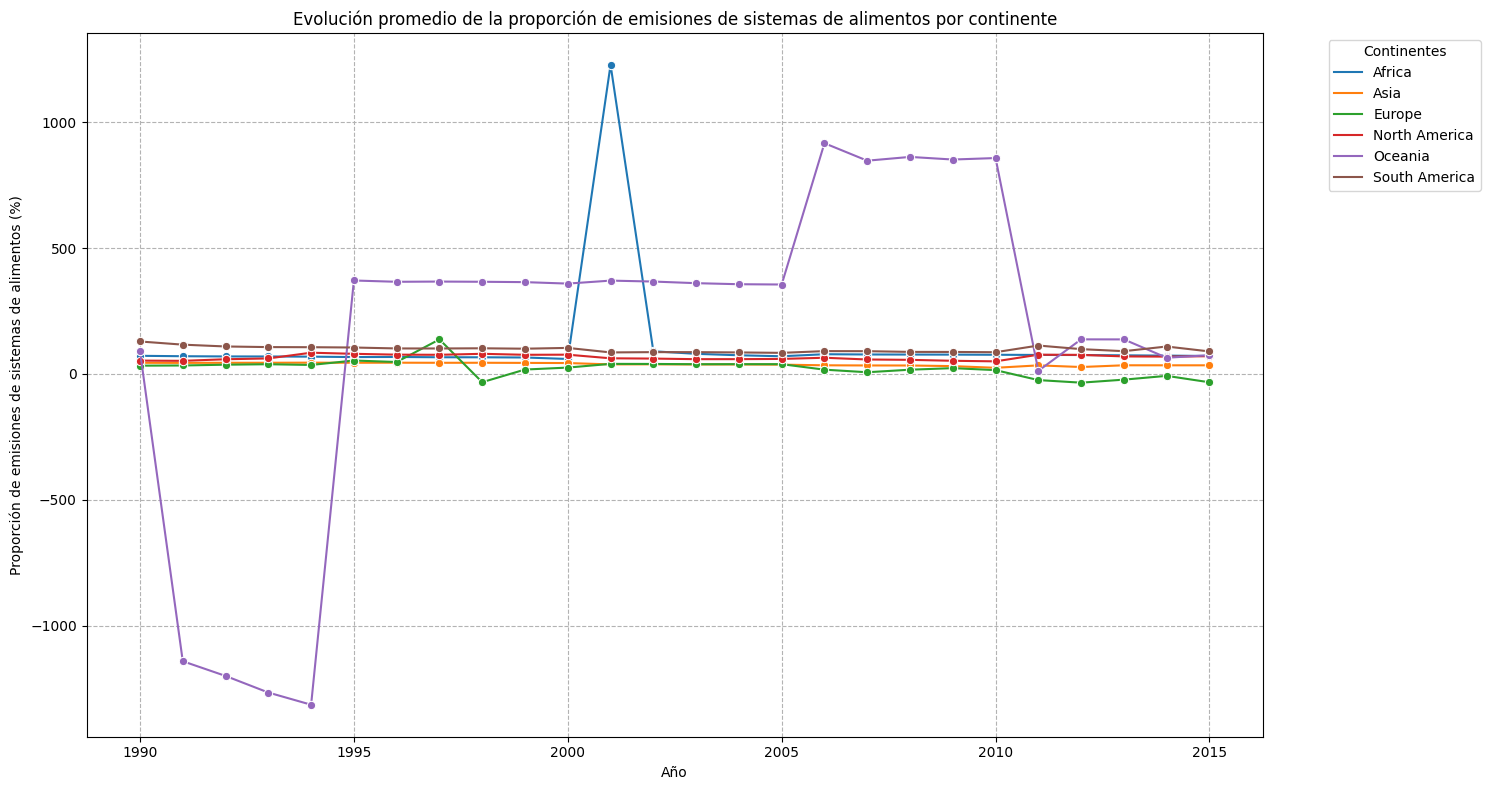

In [7]:
continent_average = data_continents.groupby(['Continent', 'Year']).mean().reset_index()
plt.figure(figsize=(15, 8))
sns.lineplot(data=continent_average, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Continent', marker="o")
plt.title("Evolución promedio de la proporción de emisiones de sistemas de alimentos por continente")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Continentes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

### Al igual que con la gráfica anterior, las líneas que muestran una tendencia ascendente indican continentes donde la proporción de emisiones ha aumentado. Un continente cuya línea es más alta a lo largo del gráfico indica que ha tenido una proporción promedio de emisiones más alta en comparación con otros continentes.

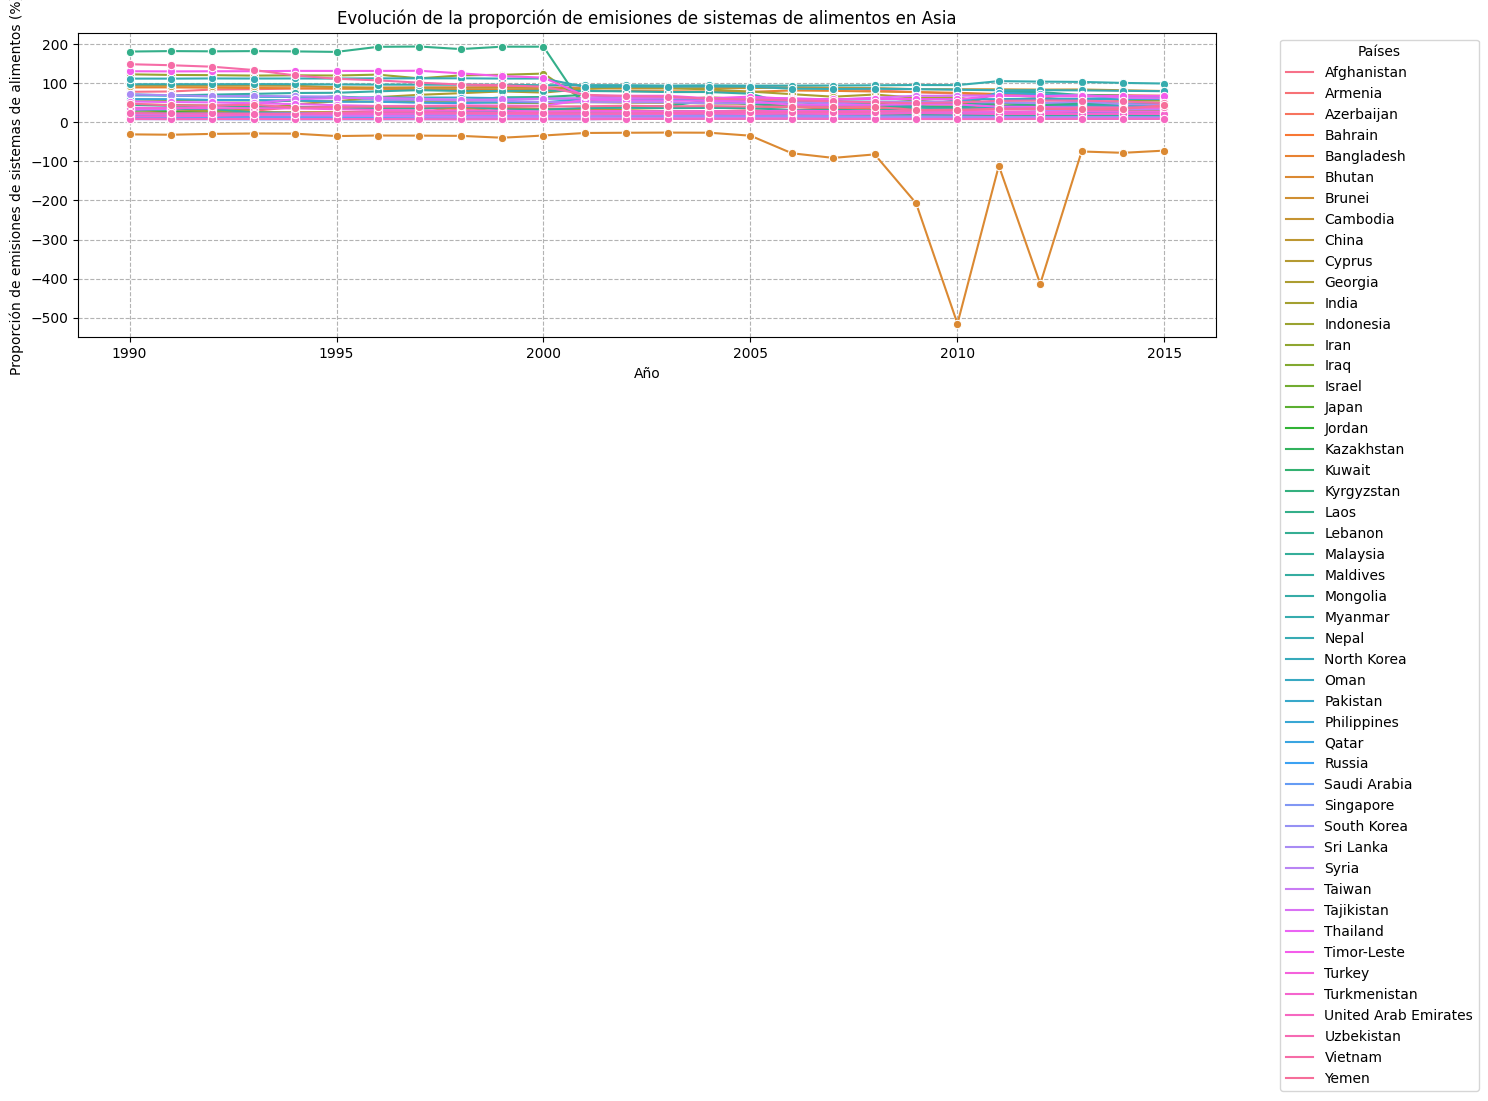

In [8]:
asia_data = data_continents[data_continents['Continent'] == 'Asia']
plt.figure(figsize=(15, 8))
sns.lineplot(data=asia_data, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Entity', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos en Asia")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

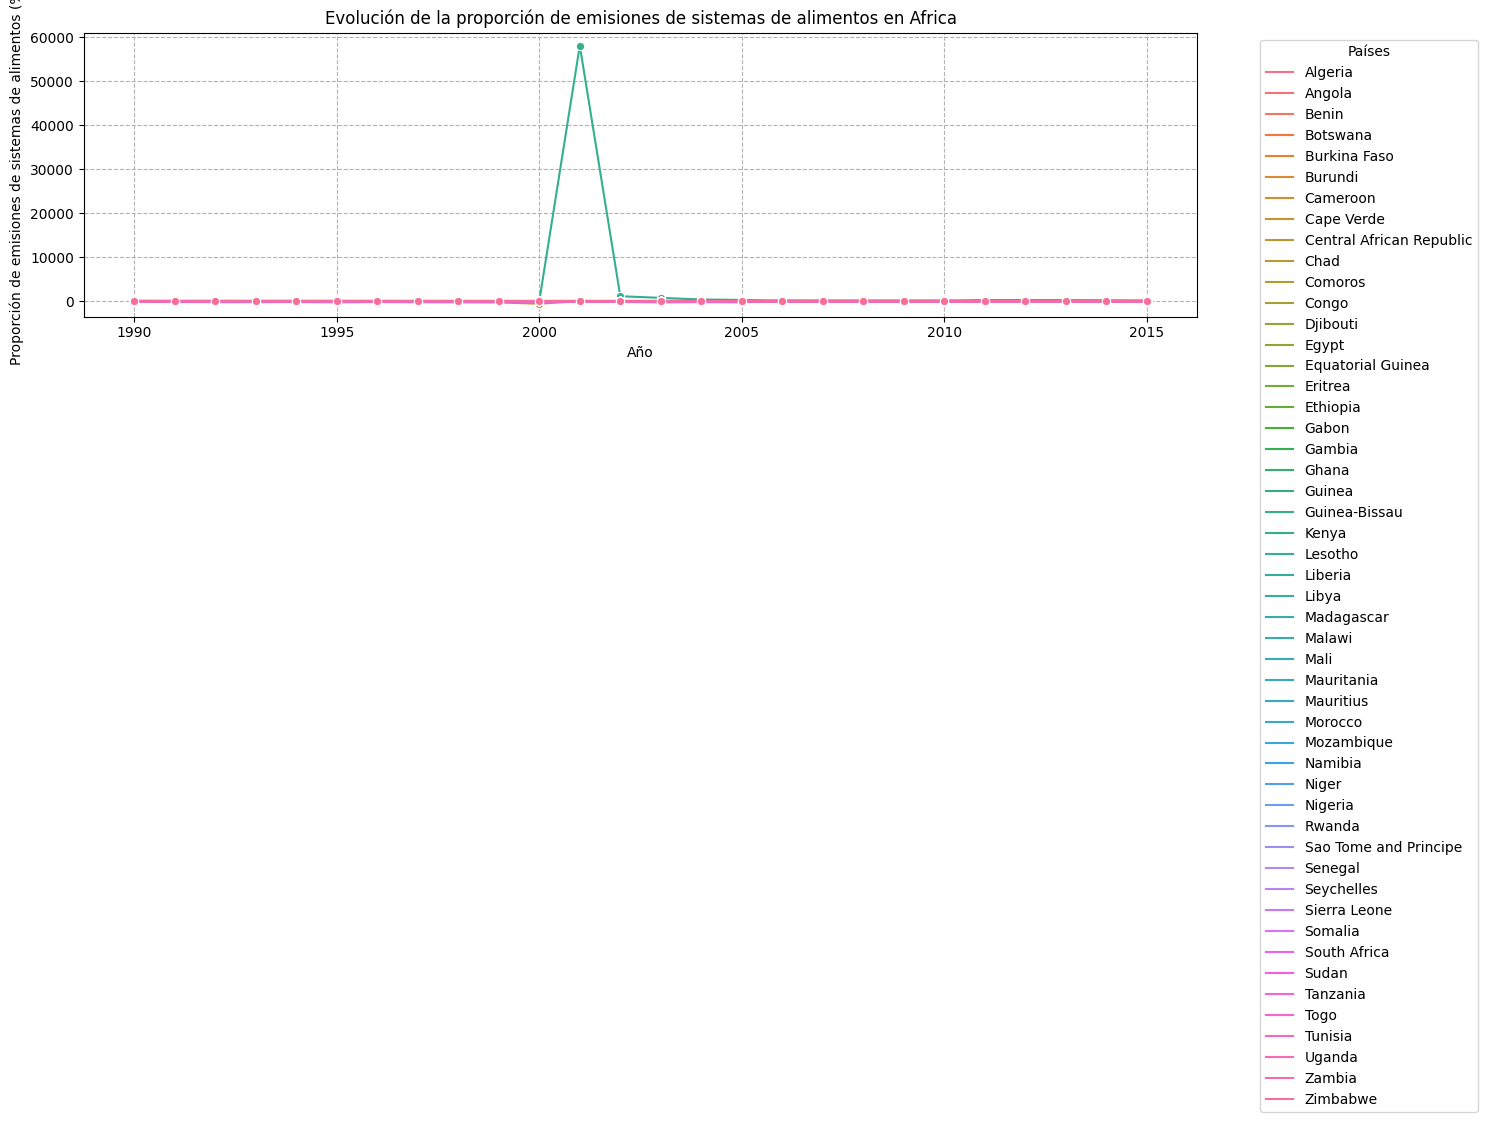

In [15]:
africa_data = data_continents[data_continents['Continent'] == 'Africa']
plt.figure(figsize=(15, 8))
sns.lineplot(data=africa_data, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Entity', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos en Africa")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

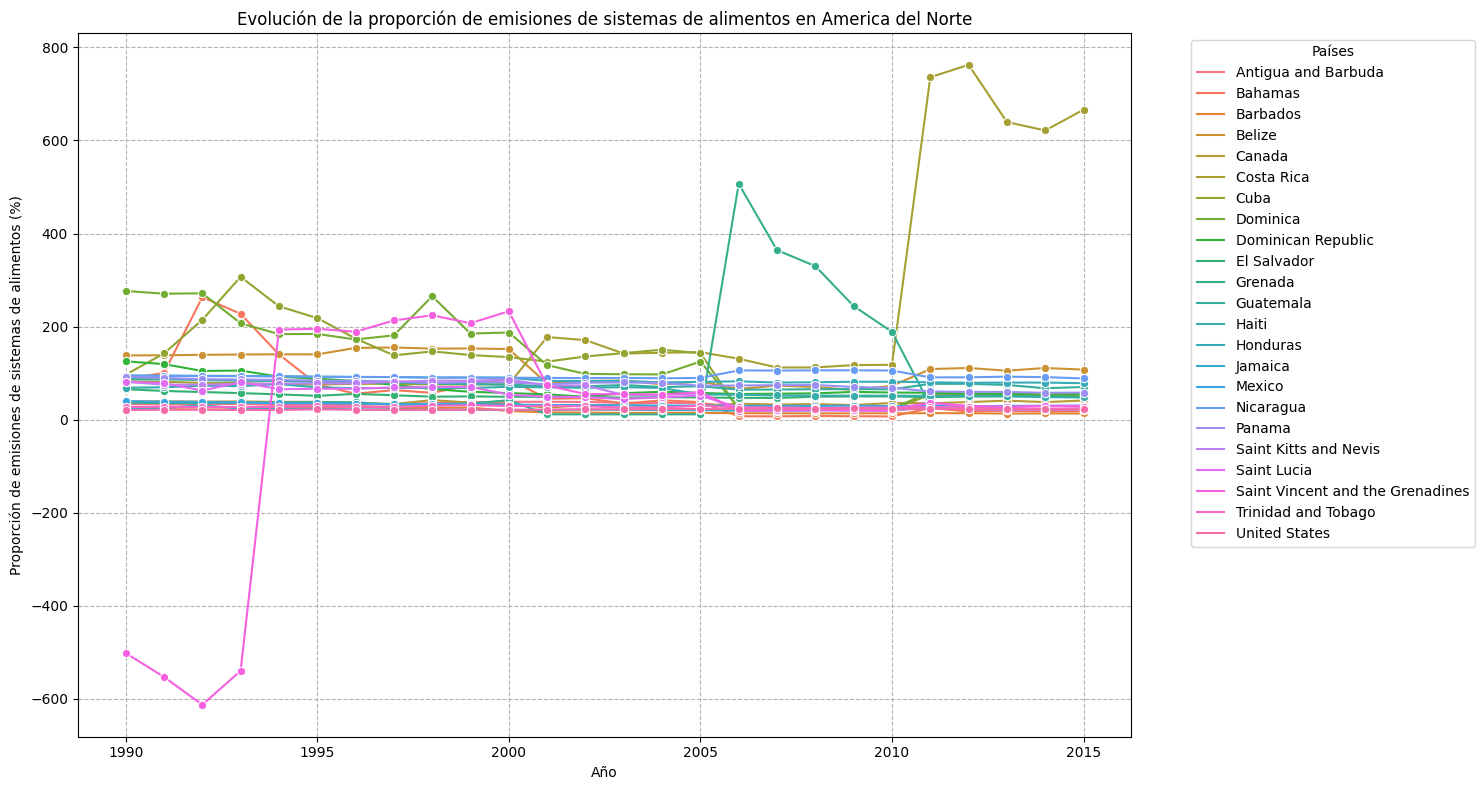

In [22]:
Namerica = data_continents[data_continents['Continent'] == 'North America']
plt.figure(figsize=(15, 8))
sns.lineplot(data=Namerica, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Entity', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos en America del Norte")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

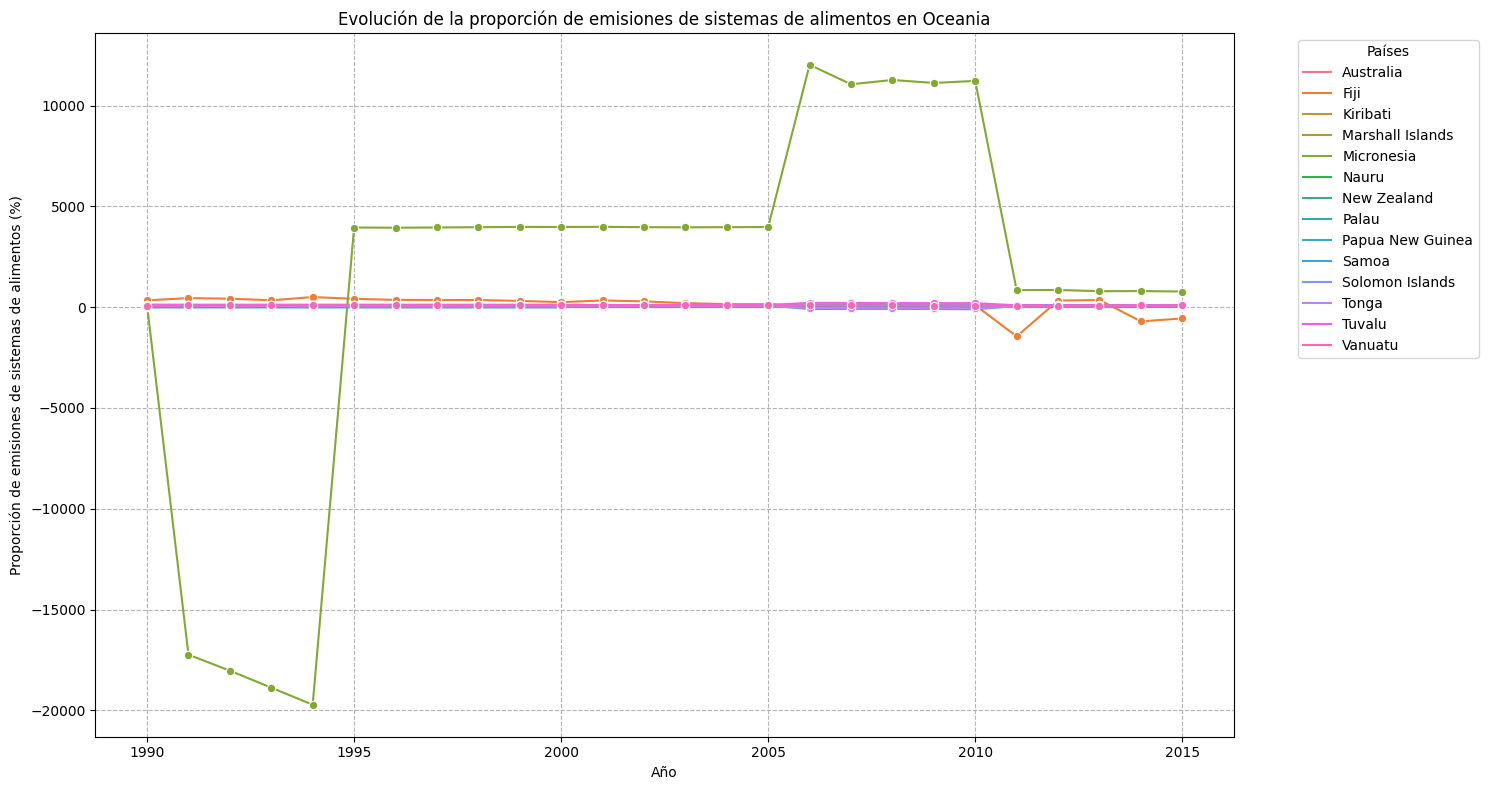

In [23]:
oceania_data = data_continents[data_continents['Continent'] == 'Oceania']
plt.figure(figsize=(15, 8))
sns.lineplot(data=oceania_data, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Entity', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos en Oceania")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

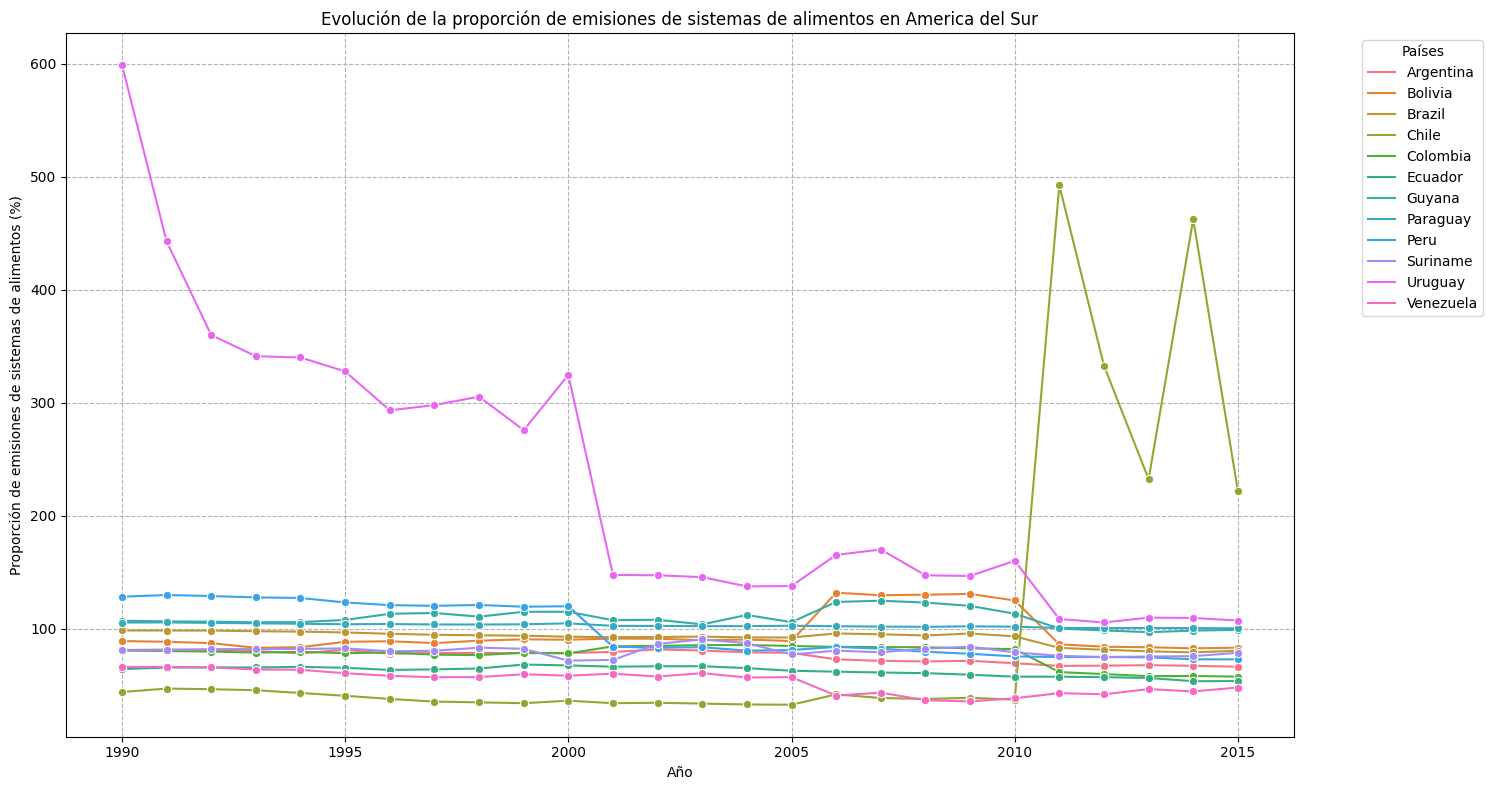

In [24]:
Samerica_data = data_continents[data_continents['Continent'] == 'South America']
plt.figure(figsize=(15, 8))
sns.lineplot(data=Samerica_data, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Entity', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos en America del Sur")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

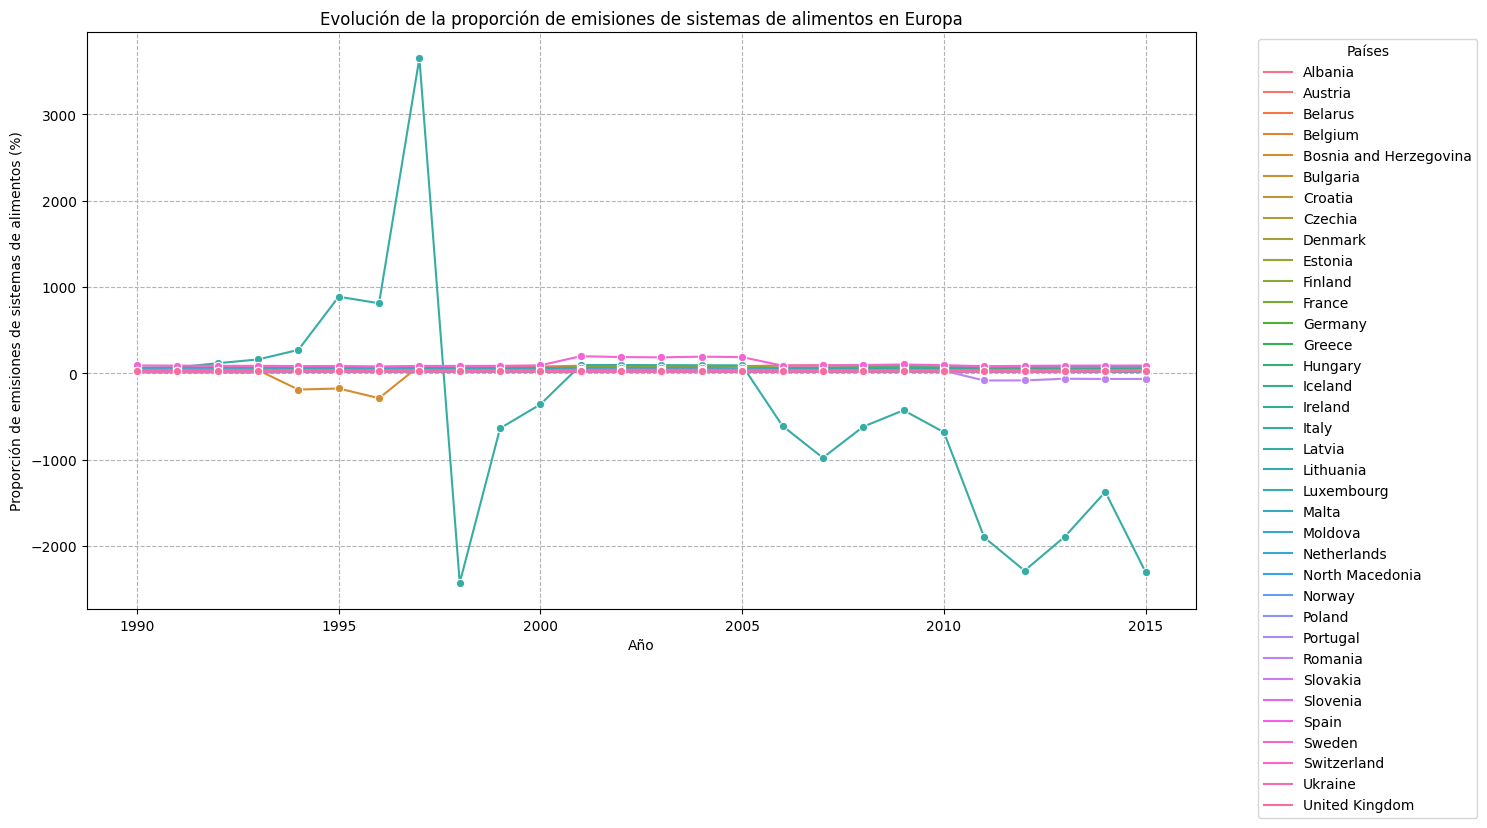

In [25]:
europa_data = data_continents[data_continents['Continent'] == 'Europe']
plt.figure(figsize=(15, 8))
sns.lineplot(data=europa_data, x='Year', y="Food's share of total emissions (incl. LULUFC)", hue='Entity', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos en Europa")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

### Los países con líneas más altas indican una mayor proporción de emisiones relacionadas con sistemas de alimentos. Las tendencias ascendentes o descendentes en las líneas indican cambios en esta proporción a lo largo del tiempo.

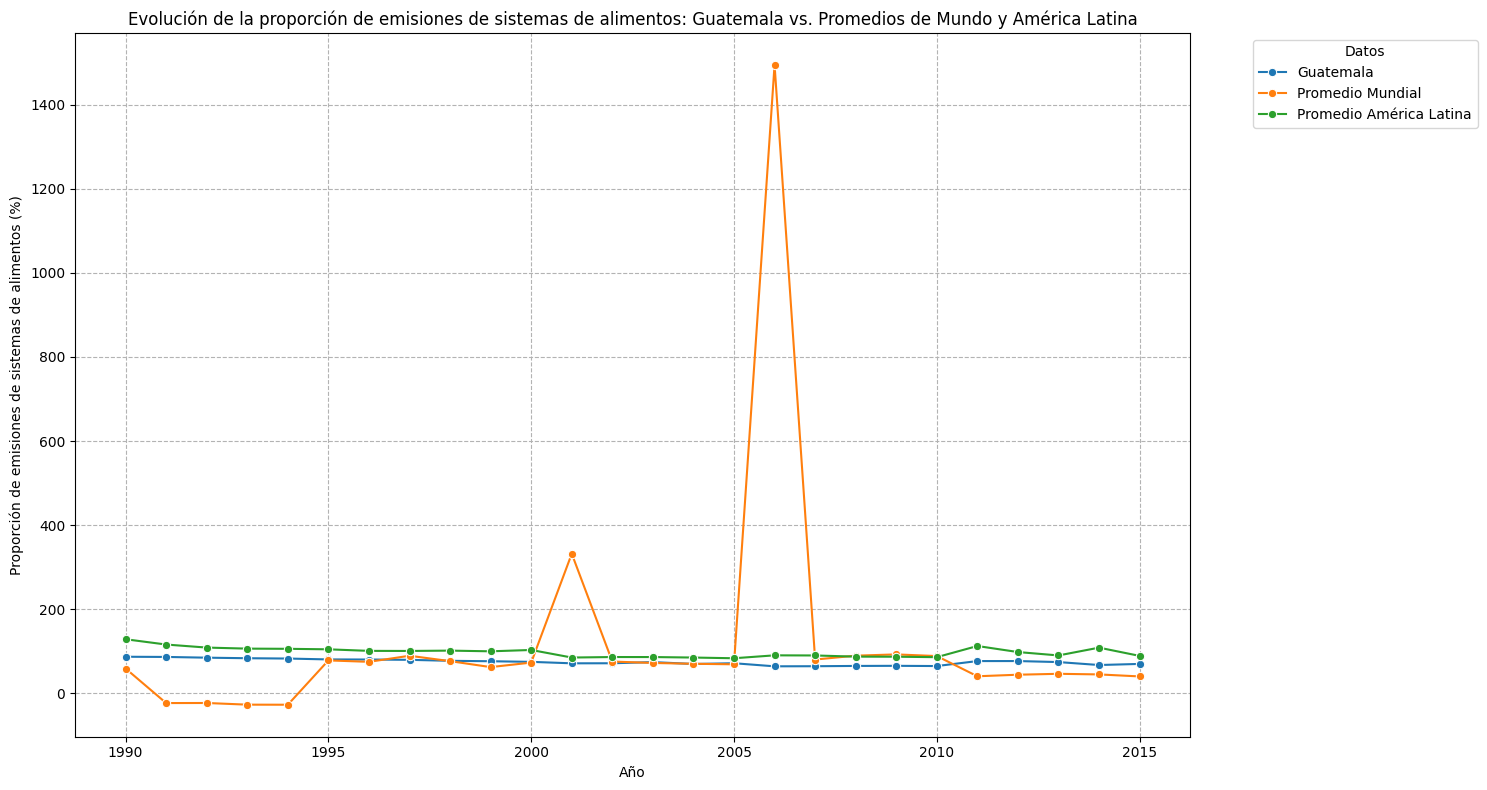

In [19]:
latin_america_average = latin_america_data.groupby('Year').mean().reset_index()
guatemala_data = data[data['Entity'] == 'Guatemala']
world_average = data.groupby('Year').mean().reset_index()
plt.figure(figsize=(15, 8))
sns.lineplot(data=guatemala_data, x='Year', y="Food's share of total emissions (incl. LULUFC)", label='Guatemala', marker="o")
sns.lineplot(data=world_average, x='Year', y="Food's share of total emissions (incl. LULUFC)", label='Promedio Mundial', marker="o")
sns.lineplot(data=latin_america_average, x='Year', y="Food's share of total emissions (incl. LULUFC)", label='Promedio América Latina', marker="o")
plt.title("Evolución de la proporción de emisiones de sistemas de alimentos: Guatemala vs. Promedios de Mundo y América Latina")
plt.xlabel("Año")
plt.ylabel("Proporción de emisiones de sistemas de alimentos (%)")
plt.legend(title="Datos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

### La línea de Guatemala está consistentemente por debajo de los promedios de América Latina y del mundo, indica que Guatemala tiene una proporción de emisiones menor, respectivamente. La dirección de la tendencia de la línea indica si esta proporción ha estado aumentando o disminuyendo con el tiempo.

¿Qué países tienen una mayor proporción y cómo ha evolucionado en los últimos años?

Basándonos en los datos más recientes, los países con la mayor proporción de emisiones de sistemas de alimentos son principalmente países de Asia, como China, India e Indonesia. También se incluyen países africanos como Nigeria y Etiopía.

La evolución a lo largo de los años muestra que mientras algunos países han mantenido su proporción de emisiones relativamente estable, otros han experimentado un aumento notable. La tendencia general es un aumento en la proporción de emisiones debido a sistemas de alimentos.

¿Cómo se comparan las diferentes regiones del mundo?

Asia es el continente con la mayor proporción de emisiones de sistemas de alimentos, seguido de África. Estas regiones tienen grandes poblaciones y economías en crecimiento, lo que podría contribuir a sus altas emisiones.
América del Norte, Europa y Oceanía tienen proporciones más bajas en comparación.

¿Cómo está la situación en Guatemala, comparada al mundo? ¿Y comparada a América Latina?

La proporción de emisiones de sistemas de alimentos en Guatemala ha mostrado un ligero incremento a lo largo de los años.
Comparado con el promedio mundial, Guatemala tiene una proporción ligeramente menor de emisiones de sistemas de alimentos.
En relación con América Latina, Guatemala se mantiene cerca del promedio de la región.

1. Teoría: Hemos tratado de seguir los principios del diseño de visualización:

- Simplicidad: Las visualizaciones son directas y no están sobrecargadas con información innecesaria.

- Claridad: Se utilizan colores y leyendas claras para facilitar la interpretación de los gráficos.

- Precisión: Los datos se representan con precisión sin distorsiones.

- Eficiencia: Las visualizaciones proporcionan insights rápidos y efectivos sobre los datos.

Parte 5: Reflexión y Camino a Seguir
1. ¿Qué experiencias individuales han tenido los miembros de su grupo?



2. Comenten sobre la importancia de la ética en la visualización de datos

La ética en la visualización de datos es esencial. Una visualización engañosa puede llevar a interpretaciones erróneas, decisiones incorrectas y desinformación. Por ejemplo, el uso de ejes que no comienzan en cero o la manipulación de la escala pueden hacer que los cambios parezcan más significativos de lo que realmente son. Un caso notorio es el de las gráficas que presentan datos sobre la evolución de la COVID-19, donde la elección de escalas, colores y diseño puede influir en la percepción del público sobre la gravedad de la situación. Es responsabilidad del creador de la visualización garantizar que los datos se presenten de manera justa y precisa.